<a href="https://colab.research.google.com/github/meenahn79/ANN/blob/master/MNIST_fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4423680/4422102 [==============================] - 0s 0us/step


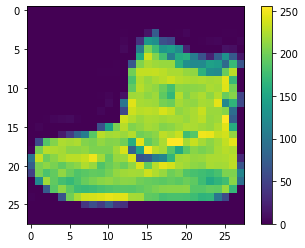

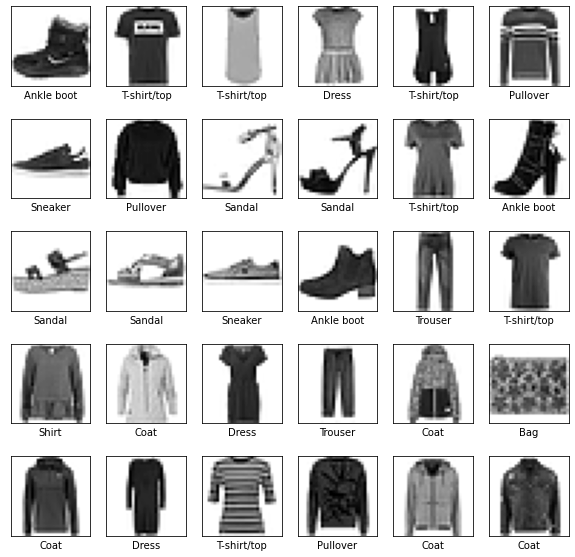

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5030 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3376 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2698 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

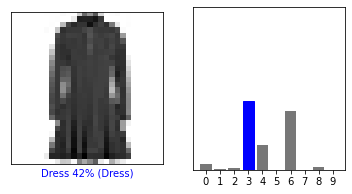

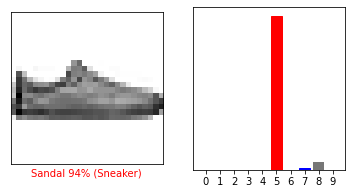

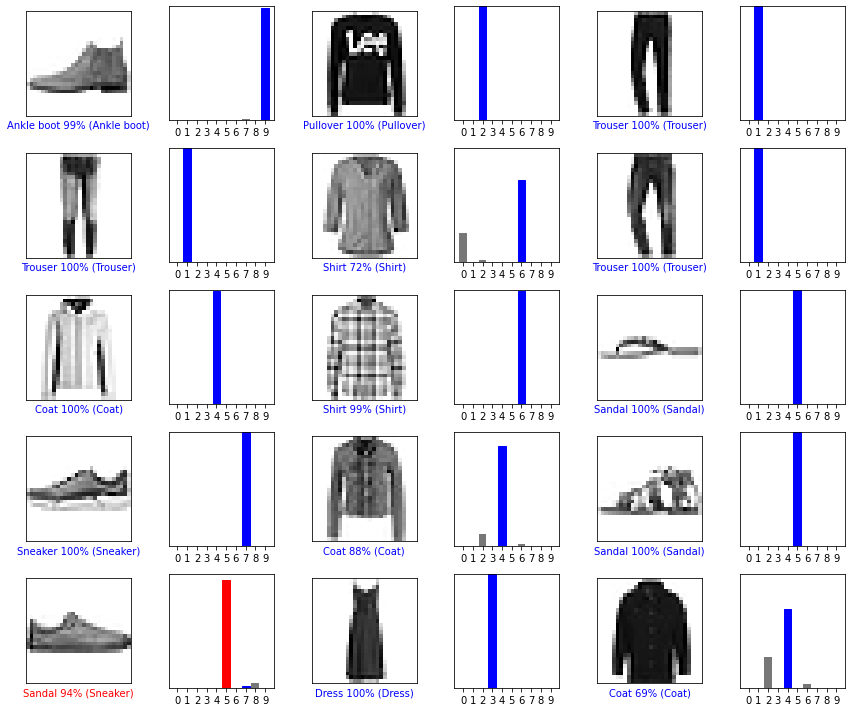

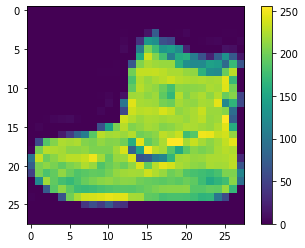

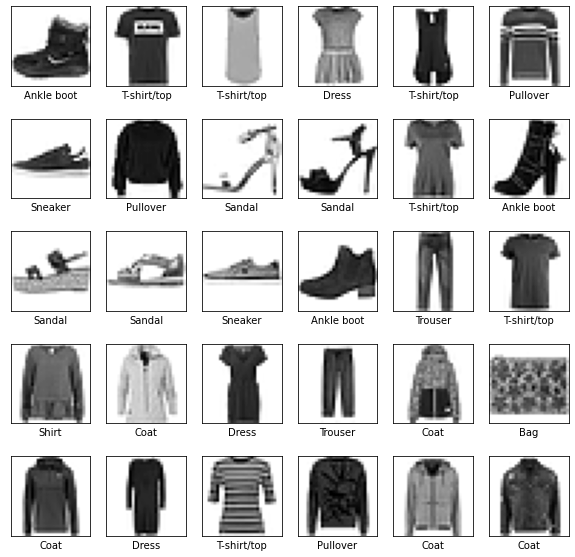

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4985 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2958 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2806 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2590 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2496 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

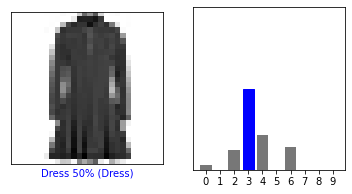

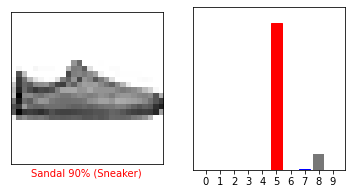

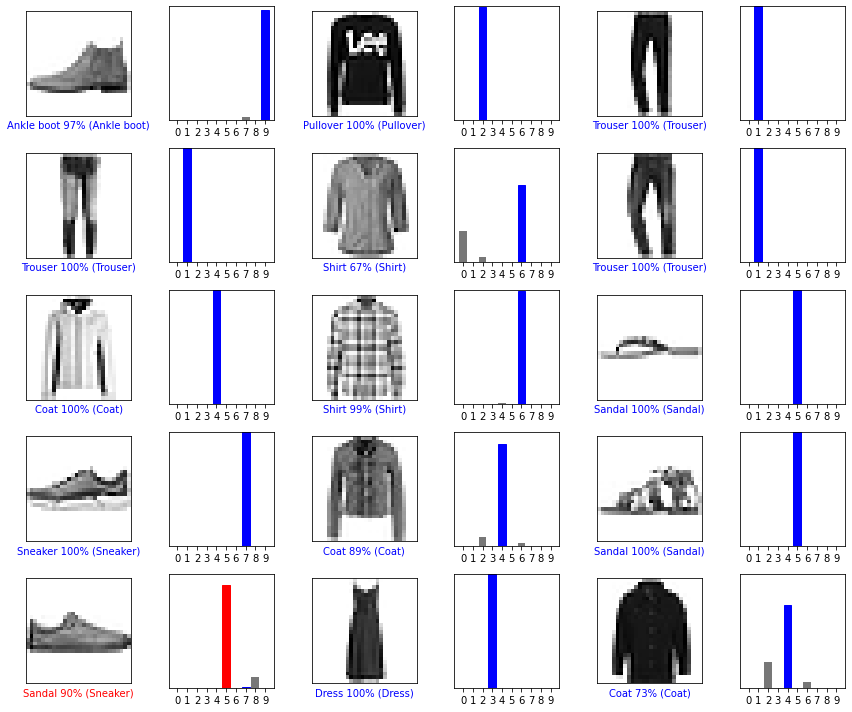

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
#------------------------------------------------------------------------------------
#Import and load the Fashion MNIST data directly from TensorFlow
#returns : train_images and train_labels arrays are the training set and 
#m         test set, the test_images, and test_labels arrays
#------------------------------------------------------------------------------------
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Each image is mapped to a single label as class names are not included with the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#------------------------------------------------------------------------------------
#explore the format of the dataset before training the model.
#------------------------------------------------------------------------------------
train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
#----------------------------------------------------------------------------------
#The data is preprocessed before training the network. trying to visualize the pixel values of first image before preprocess
#--------------------------------------------------------------------------------
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
#----------------------------------------------------------------------------------
#Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255.
#----------------------------------------------------------------------------------
train_images = train_images / 255.0
test_images = test_images / 255.0
#----------------------------------------------------------------------------------
#To verify that the data is in the correct format before training the network. verfying for 30 images
#----------------------------------------------------------------------------------
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
#----------------------------------------------------------------------------------
#Building the Convolutional neural network requires configuring the layers of the model
#----------------------------------------------------------------------------------
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#----------------------------------------------------------------------------------
#compile the model with the parameter optimze, loss function, metric
#----------------------------------------------------------------------------------
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#----------------------------------------------------------------------------------
#Train the model by fitting the traiing set with epoc size
#----------------------------------------------------------------------------------
model.fit(train_images, train_labels, epochs=10)
#----------------------------------------------------------------------------------
#compare how the model performs on the test dataset:
#----------------------------------------------------------------------------------
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
#----------------------------------------------------------------------------------
#with the model trained, make predictions about some test images
#Attach a softmax layer to convert the logits to probabilities, for easy interpretation
#----------------------------------------------------------------------------------
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
#----------------------------------------------------------------------------------
#predicted the label for each image in the testing set. prediction is an array of 10 numbers. 
#They represent the model's "confidence" that the image corresponds to each of the 10 different class labels
#print the max confidence of the model for an artcile for a class
#----------------------------------------------------------------------------------
predictions = probability_model.predict(test_images)
predictions[0]
test_labels[0]
np.argmax(predictions[0])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()